In [1]:
import tushare as ts
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

token='5d12fd005a33f96b664b0a393e72288545d2dfd6723be471c0bdb47f'
try:
    pro = ts.pro_api(token)
    df = pro.query('daily', ts_code='000001.SZ', start_date='20191201', end_date='20200924')
    df.to_csv('stockdata.csv') # 保存数据
    print('Saved')
except:
    print('Not saved')


Saved


Implementation 1

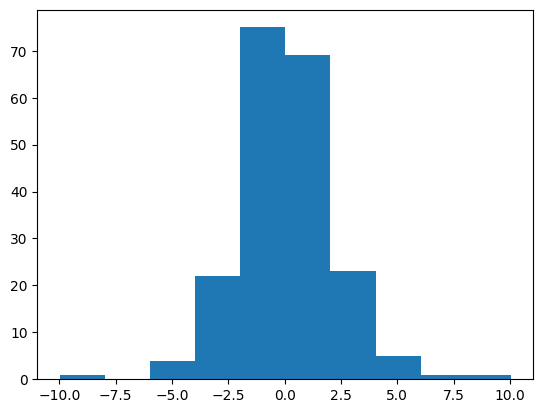

In [3]:
data = pd.read_csv('stockdata.csv')[::-1]
df0 = data['pct_chg']
plt.hist(df0)
plt.show() # 涨跌幅分布

In [4]:
df0.head()

200    0.4578
199    0.5859
198   -0.9061
197    0.7838
196    1.1017
Name: pct_chg, dtype: float64

In [16]:
sigma = (df0/100).std()
n = df0.shape[0]
dt = 1/n
mu = (df0/100).mean()
drt = mu*dt # ?
pe = data['close'].iloc[0]
sigs = sigma * np.sqrt(dt) # ?

In [14]:
pe

15.36

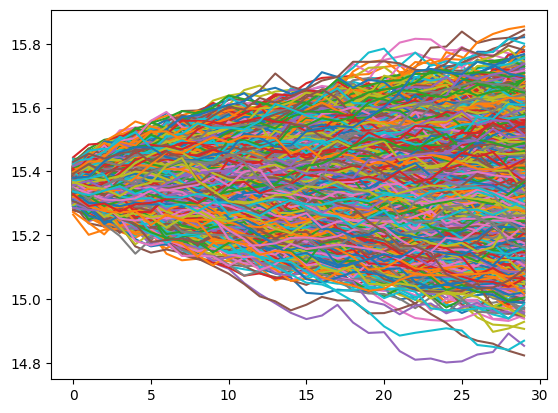

In [21]:
from numpy import random
# p_new = p_old + p_old * (random.normal(drt, sigs))

all_preds = []
for _ in range(10000):
    pred_list = []
    pn = pe

    for day in range(30):
        pn = pn + pn * (random.normal(drt, sigs))

        if pn < 0.1: # boundary
            pn = pred_list[-1]
        pred_list.append(pn)
    all_preds.append(pred_list)

all_preds = np.array(all_preds).T
plt.plot(all_preds)
plt.show()
plt.close()
    

In [24]:
initial_value = pe
expected_price_last_day = np.mean(all_preds, axis=1)[-1]

print(pe, expected_price_last_day)

15.36 15.36007153184812


Implementation 2

In [5]:
data.columns

Index(['Unnamed: 0', 'ts_code', 'trade_date', 'open', 'high', 'low', 'close',
       'pre_close', 'change', 'pct_chg', 'vol', 'amount'],
      dtype='object')

In [14]:
return_ = np.log10(data['pct_chg']/100 + 1)
return_.head

# drift = average daily return - variance / 2
mean = return_.mean()
var = return_.var()
print(f"mean: {mean}, variance: {var}")

mean: 1.2724504742651792e-05, variance: 8.835662535709367e-05


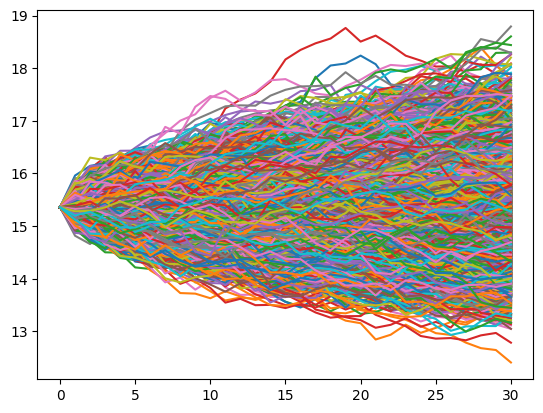

In [18]:
from scipy.stats import norm
pe = data['close'].iloc[0]
drift = mean - var / 2
std = return_.std()

trajectories = []
for time in range(10000):
    pricelist = [pe]
    pn = pe

    for _ in range(30):
        r = std * norm.ppf(np.random.uniform(0, 1))
        pn = pn * np.e ** (drift + r)
        pricelist.append(pn)
    trajectories.append(pricelist)

trajectories = np.array(trajectories).T
plt.plot(trajectories)
plt.show()
plt.close()



参考资料

利用基本蒙特卡罗模拟方法进行股价后续走势建模【Python】 https://zhuanlan.zhihu.com/p/342624971

Monte Carlo Simulation: History, How it Works, and 4 Key Steps https://www.investopedia.com/terms/m/montecarlosimulation.asp 